# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | coahuayana de hidalgo
Processing Record 3 of Set 1 | upata
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | san luis de la loma
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | adrar
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | naberera
Processing Record 12 of Set 1 | ta`u
Processing Record 13 of Set 1 | kone
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | verkh-tula
Processing Record 19 of Set 1 | carbonear
Processing Record 20 of Set 1 | canmore
Processing Record 21 of Set 1 | san isidro
Processing Record 22 of Set 1 | lorengau
Proc

Processing Record 34 of Set 4 | rongelap
Processing Record 35 of Set 4 | roswell
Processing Record 36 of Set 4 | ribeira grande
Processing Record 37 of Set 4 | susuman
Processing Record 38 of Set 4 | ulaangom
Processing Record 39 of Set 4 | arno
Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | sao felix do xingu
Processing Record 42 of Set 4 | wynyard
Processing Record 43 of Set 4 | san jose village
City not found. Skipping...
Processing Record 44 of Set 4 | petropavlovsk-kamchatsky
Processing Record 45 of Set 4 | port isabel
Processing Record 46 of Set 4 | tindouf
Processing Record 47 of Set 4 | karasu
Processing Record 48 of Set 4 | yaren
Processing Record 49 of Set 4 | katsuura
Processing Record 0 of Set 5 | christchurch
Processing Record 1 of Set 5 | dickinson
Processing Record 2 of Set 5 | kas
Processing Record 3 of Set 5 | magadan
Processing Record 4 of Set 5 | port douglas
Processing Record 5 of Set 5 | mugia
Processing Record 6 of Set 5 | nishinoomote
Pr

Processing Record 21 of Set 8 | chebba
Processing Record 22 of Set 8 | carnarvon
Processing Record 23 of Set 8 | jumla
Processing Record 24 of Set 8 | eduardo castex
Processing Record 25 of Set 8 | oualidia
City not found. Skipping...
Processing Record 26 of Set 8 | kurakhovo
Processing Record 27 of Set 8 | marion
Processing Record 28 of Set 8 | rovaniemi
Processing Record 29 of Set 8 | belomorsk
Processing Record 30 of Set 8 | dawei
Processing Record 31 of Set 8 | zhatay
Processing Record 32 of Set 8 | dunay
Processing Record 33 of Set 8 | orda
Processing Record 34 of Set 8 | vallenar
Processing Record 35 of Set 8 | chittaurgarh
Processing Record 36 of Set 8 | axim
Processing Record 37 of Set 8 | tarawa
Processing Record 38 of Set 8 | punta del este
Processing Record 39 of Set 8 | salekhard
Processing Record 40 of Set 8 | mirny
Processing Record 41 of Set 8 | happy valley-goose bay
Processing Record 42 of Set 8 | hobyo
Processing Record 43 of Set 8 | hemsby
Processing Record 44 of Set

Processing Record 14 of Set 12 | vila velha
Processing Record 15 of Set 12 | prado
Processing Record 16 of Set 12 | ifrane
Processing Record 17 of Set 12 | belmonte
Processing Record 18 of Set 12 | samoylovka
Processing Record 19 of Set 12 | nizhniy odes
Processing Record 20 of Set 12 | olonets
Processing Record 21 of Set 12 | conde
Processing Record 22 of Set 12 | el fasher
Processing Record 23 of Set 12 | bucerias
Processing Record 24 of Set 12 | brak
Processing Record 25 of Set 12 | inirida
Processing Record 26 of Set 12 | papao
Processing Record 27 of Set 12 | yankton
Processing Record 28 of Set 12 | newman
Processing Record 29 of Set 12 | slyudyanka
Processing Record 30 of Set 12 | linden
Processing Record 31 of Set 12 | saint-felicien
Processing Record 32 of Set 12 | bamboo flat
Processing Record 33 of Set 12 | nema
Processing Record 34 of Set 12 | hecun
Processing Record 35 of Set 12 | zambezi
Processing Record 36 of Set 12 | lazaro cardenas
Processing Record 37 of Set 12 | vurn

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,-12.82,89,100,11.18,RU,1710692579
1,coahuayana de hidalgo,18.7000,-103.6583,27.95,38,90,1.27,MX,1710692579
2,upata,8.0086,-62.3989,34.02,38,89,4.30,VE,1710692579
3,adamstown,-25.0660,-130.1015,26.16,83,39,4.50,PN,1710692579
4,san luis de la loma,17.2706,-100.8939,28.48,50,53,1.76,MX,1710692580


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-12.82,89,100,11.18,RU,1710692579
1,coahuayana de hidalgo,18.7000,-103.6583,27.95,38,90,1.27,MX,1710692579
2,upata,8.0086,-62.3989,34.02,38,89,4.30,VE,1710692579
3,adamstown,-25.0660,-130.1015,26.16,83,39,4.50,PN,1710692579
4,san luis de la loma,17.2706,-100.8939,28.48,50,53,1.76,MX,1710692580


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

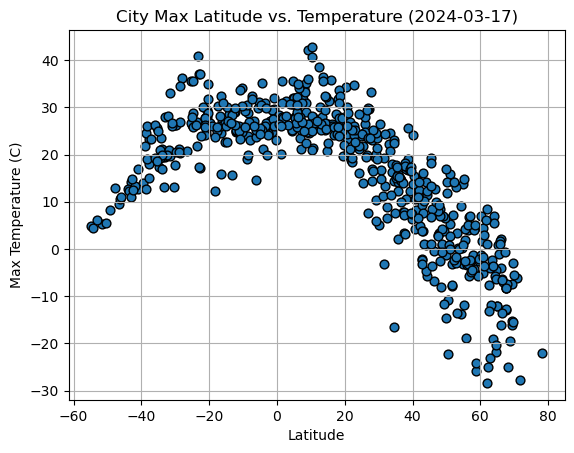

In [12]:
# Scatter plot for latitude vs. temperature (Includes graph properties)
city_data_df.plot(kind='scatter', x='Lat',y='Max Temp', title='City Max Latitude vs. Temperature (2024-03-17)',
                 xlabel='Latitude', ylabel='Max Temperature (C)', grid=True, edgecolors='black', s=40)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

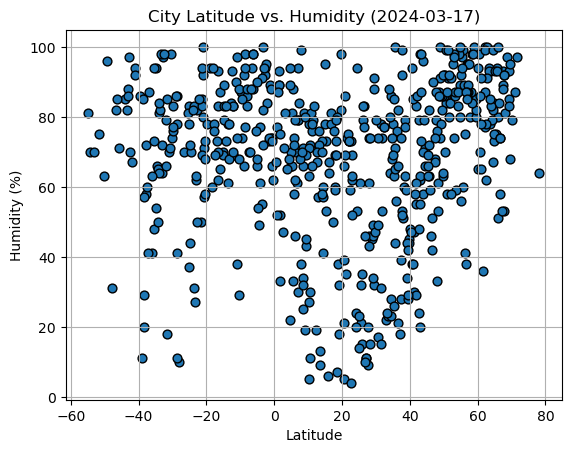

In [13]:
# Scatter plot for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', edgecolors='black', s=40)

# Graph properties
plt.title('City Latitude vs. Humidity (2024-03-17)')
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

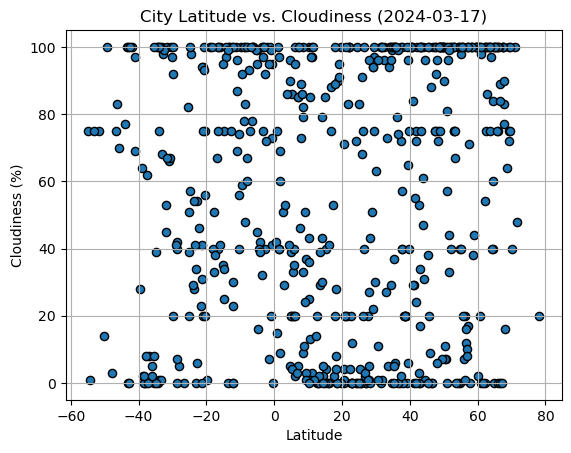

In [14]:
# Scatter plot for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', edgecolors='black', s=35)

# Graph properties
plt.title('City Latitude vs. Cloudiness (2024-03-17)')
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

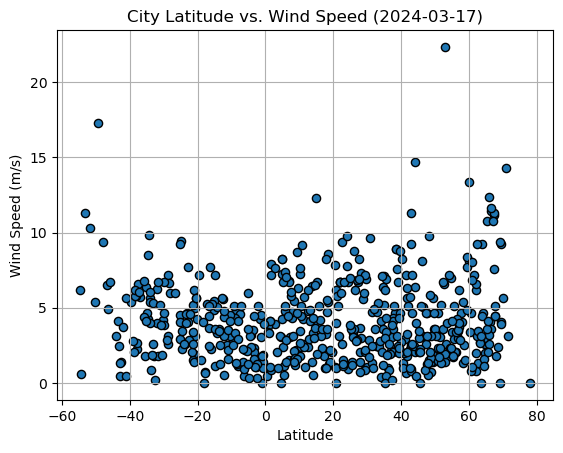

In [15]:
# Scatter plot for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', edgecolors='black', s=35)

# Graph properties
plt.title('City Latitude vs. Wind Speed (2024-03-17)')
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [50]:
# Define a function to create Linear Regression plots (Continue setting up function!!!)
def Linear_Regression(x_values, y_values, x_label, y_label, x_coord, y_coord):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    print(f'the r value is: {rvalue}')
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_coord, y_coord),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-12.82,89,100,11.18,RU,1710692579
1,coahuayana de hidalgo,18.7000,-103.6583,27.95,38,90,1.27,MX,1710692579
2,upata,8.0086,-62.3989,34.02,38,89,4.30,VE,1710692579
4,san luis de la loma,17.2706,-100.8939,28.48,50,53,1.76,MX,1710692580
6,tura,25.5198,90.2201,21.73,21,0,1.42,IN,1710692580


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.066,-130.1015,26.16,83,39,4.50,PN,1710692579
5,hithadhoo,-0.600,73.0833,28.68,66,73,1.40,MV,1710692580
8,ushuaia,-54.800,-68.3000,4.81,81,75,6.17,AR,1710692354
9,port-aux-francais,-49.350,70.2167,8.18,96,100,17.27,TF,1710692581
10,naberera,-4.200,36.9333,21.07,77,42,3.16,TZ,1710692581


###  Temperature vs. Latitude Linear Regression Plot

the r value is: -0.8771741210983971


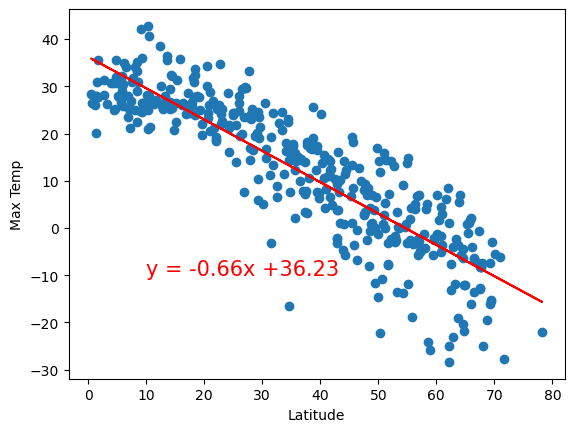

In [57]:
# Linear regression on Northern Hemisphere
Linear_Regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 10, -10)

the r value is: 0.6241154954286573


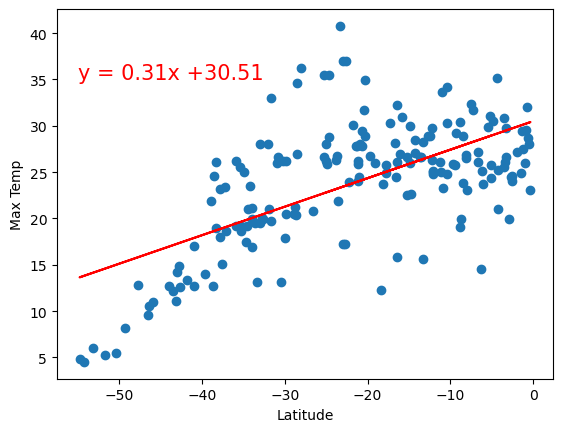

In [61]:
# Linear regression on Southern Hemisphere
Linear_Regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', -55, 35)

**Discussion about the linear relationship:** For cities within the Northern hemisphere, as latitude increases, max temperature decreases (strong negative correlation). For cities within the Southern hemisphere, as latitude increases, max temperature also increases (moderate positive correlation). 

### Humidity vs. Latitude Linear Regression Plot

the r value is: 0.3583092831285817


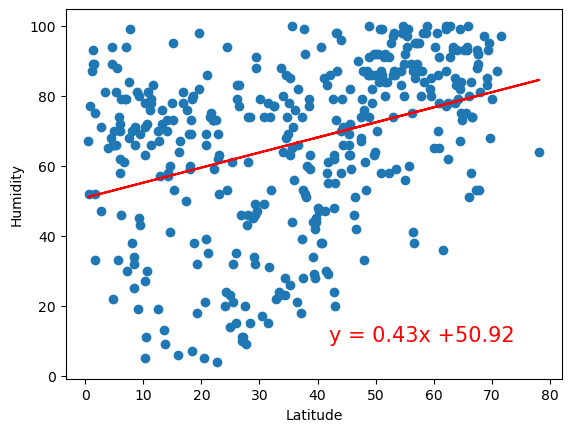

In [62]:
# Northern Hemisphere
Linear_Regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 42, 10)

the r value is: 0.1776867271598651


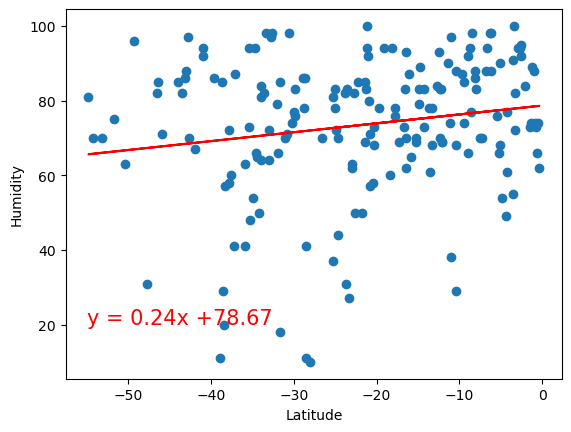

In [63]:
# Southern Hemisphere
Linear_Regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', -55, 20)

**Discussion about the linear relationship:** For cities within the Northern hemisphere, as latitude increases, the humidity of these locations tends to also increase (weak positive correlation). However, there seems to be a very weak relationship between latitude and humidity for the Southern hemisphere (weaker than the Northern hemisphere). 

### Cloudiness vs. Latitude Linear Regression Plot

the r value is: 0.24816523003798818


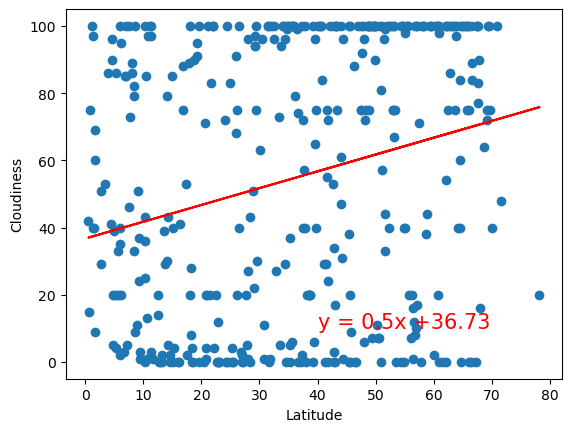

In [66]:
# Northern Hemisphere
Linear_Regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 40, 10)

the r value is: 0.22923369001082766


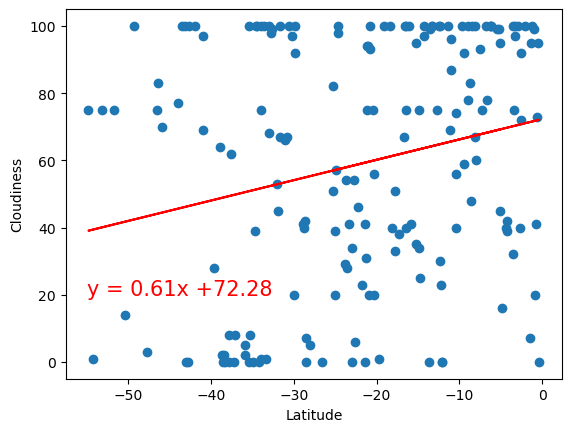

In [68]:
# Southern Hemisphere
Linear_Regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', -55, 20)

**Discussion about the linear relationship:** While the pearson correlation coefficients for both plots (Northern and Southern) display weak relationships between latitude and cloudiness, based on the large number of potential outliers, the correlation coefficients will not be useful at describing the relationships. For this reason, there does not seem to be a relationship between latitude and cloudiness from the 576 randomly picked cities from both the Northern and Southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

the r value is: 0.0552270171103333


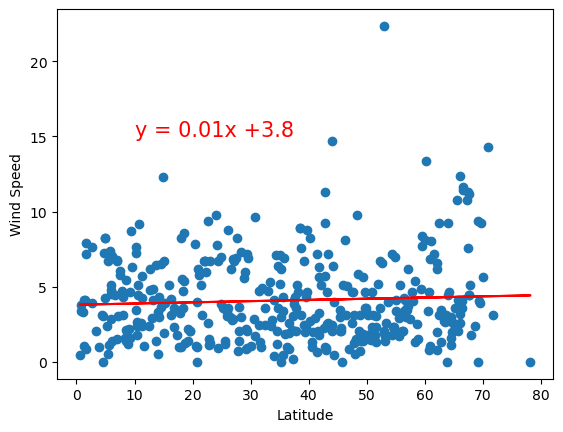

In [70]:
# Northern Hemisphere
Linear_Regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 10, 15)

the r value is: -0.39326516289791713


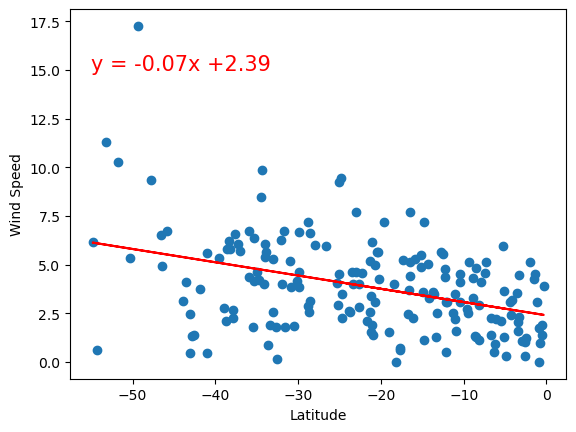

In [72]:
# Southern Hemisphere
Linear_Regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', -55, 15)

**Discussion about the linear relationship:** There does not seem to be a relationship between latitude and wind speed for the Northern hemisphere. However, for the Southern hemisphere, as latitude increases, wind speeds tends to decrease (weak to moderate negative correlation).